Physics 215 (1st Semester AY 2022-2023)

Richelle Jade L. Tuquero

# Session 2.1 Exploring ODE Solver
Typical of many languages from `c/c++` to `Python`, solvers have a common grammar and framework. For ODE systems, the former uses the `GSL solver` and the latter uses `scipy.integrate` module.
Objective: Compare a customized ODE solver with the one available from the `DifferentialEquations.jl` from the SciML.
- [X] KR1: Plot an implemented function to be integrated based on a given 1D problem (1st-order ODE).
- [X] KR2: Implement a 1D ODE solver using the Euler method using functions just like the ODE solver packages.
- [X] KR3: Plot the solution obtained via the Euler method.
- [X] KR4: Compare the custom  created from the default ODE solver of the `DifferentialEquations.jl` package.
- [X] KR5: Discuss at least one possible point of expansion of the custom package and follow the usual usage pattern of the packages (addition of default parameter arguments, for example).

In [1]:
using Pkg
Pkg.activate(".")
Pkg.add("Plots")
Pkg.update()

using Plots

  Activating project at `~/Desktop/Physics 215/Submission/Session 2.1`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/Desktop/Physics 215/Submission/Session 2.1/Project.toml`
  No Changes to `~/Desktop/Physics 215/Submission/Session 2.1/Manifest.toml`
    Updating registry at `~/.julia/registries/General.toml`
  No Changes to `~/Desktop/Physics 215/Submission/Session 2.1/Project.toml`
  No Changes to `~/Desktop/Physics 215/Submission/Session 2.1/Manifest.toml`


# KR1
Plot an implemented function to be integrated based on a given 1D problem (1st-order ODE).

# Logistic Growth Model

Suppose you have an initial population $P_0$ and we want to determine how the population $P$ changes with time $t$. It is important to note that there exists a maximum population which we refer to as the carrying capacity $K$. Moreover, the population is also affected by the constant of proportionality $r$. We model this situation using the 
[Logistic growth model](https://www.maa.org/book/export/html/115630) given by
\begin{equation}
\frac{dP}{dt} = f(P, r, K, t)
\end{equation}
where 
\begin{equation}
f(P, r, K, t) = rP\left(1-\frac{P}{K}\right).\label{2}
\end{equation}

For brevity, I will refer to Eq. $\eqref{2}$ as 
\begin{equation}
f(P, par, t) = f(P, (r, K), t)
\end{equation}
where $par = (r, K)$ which are the parameters.


In [2]:
# Let us first define the parameters
r = 1   # constant of proportionality
K = 100   # carrying capacity

par = [r, K] # list of parameters

""" Our function for the logistic growth model """
f(P, par, t) = par[1]*P*(1-P/par[2]) 

f

# Plotting the function for different P
Since we now have our function let us plot the function for varying values of $P$.

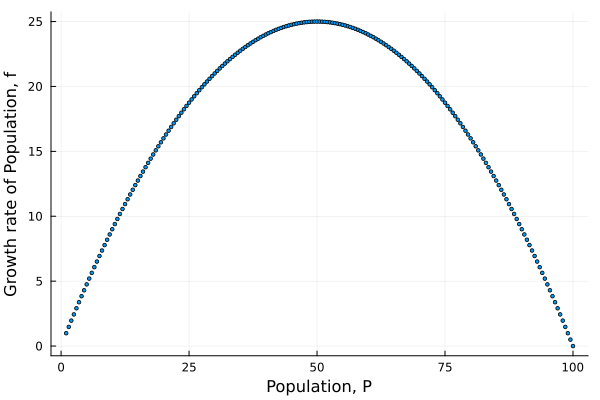

In [3]:
# Implementing different values of P.
Prange = range(1, 100, step = 0.5)
Func = [f(p, par, 0.0) for p in Prange]

scatter(Prange, Func, mode = "markers", markersize = 2, xlabel = "Population, P", ylabel= "Growth rate of Population, f", legend = false)

Our initial observation shows that the peak of the growth rate of population is when $P= 50$ which is half of the carrying capacity $K$. Moreover, there is also no growth when $P=K$. This makes sense since the population should not exceed the carrying capacity.

# KR2 
Implement a 1D ODE solver using the Euler method using functions just like the ODE solver packages.

Normally, I would solve for the ODE by directly using the Euler method with the function as an input, as shown below using the self-defined function ``Euler``. The introduction of the Euler's method is discussed in the ``ODE_solve``.

In [4]:
? Euler

search: schedule NamedTuple promote_rule baremodule @NamedTuple parentmodule

Couldn't find Euler
Perhaps you meant Expr, let, hue, uperm, Timer, quiver, filter, Number or Tuple


No documentation found.

Binding `Euler` does not exist.


In [5]:
function Euler( f, y0, dt )
    t = range(0, 5, step = dt);
    y = zero(eltype(f))
    y[1] = y0
    for n in range(1, len(t)-1)
        y[n+1] = y[n] + dt * f(t[n], y[n]) #Euler's method
    end
end

Euler (generic function with 1 method)

# Input-Output pairs for our 1D ODE solver

However, ODE problems uses input of objects that has objects. This would be very helpful in terms of answering the general problems. In order to define our function which will solve the ODE, let us first define the objects that should be present. 

We plan to implement a function which we will refer to as ``ODE_solve``, this will contain the Euler method which will have an input of
- ``prob``: this will be a ``struct`` which will describe the problem. Hence it includes the function and the initial and range of values to be tested.

Since, we now have our input object, we will also need an output object in the ``ODE_solve`` which is
- ``soln``: this will return the time propagation and the corresponding value of the function that needs to be evaluated.

# Problem and Solution object

Let us first check if there is any function named as ``prob`` and ``soln`` to avoid overloading functions.

In [6]:
? prob

search: pointer_from_objref unsafe_pointer_to_objref prod prod! promote

Couldn't find prob
Perhaps you meant prod, prod!, plot, kron, print, par, parse, pie, pie! or plot!


No documentation found.

Binding `prob` does not exist.


In [7]:
? soln

search: base_colorant_type sortslices Symbol base_color_type showable isreadonly

Couldn't find soln
Perhaps you meant sort, sign, sin, Colon, join, Some, sort!, isodd or isone


No documentation found.

Binding `soln` does not exist.


Since neither have any functions with the same name, we will now begin writing the objects. Note that the contents of the input-output pairs are
- ``prob::( f, P0, t_len, par )``
- ``soln::( t, u)``

In [8]:
``` This will be the object for the problem which 
contains the parameters and function. ```

struct prob
    f::Function  # Function of the problem
    P0          # Initial value of our population
    par::Vector  # List of parameters
    t_len::Tuple # the time from start to end
end

In [9]:
``` This will be the object for the solution which 
contains the result or solution as well as time. ```

struct soln
    t # values for time
    u # solution for the population
end

Before we define our function that uses the Euler method, let us check if the ``problem`` and ``result`` objects are working by using the macro ``@show`` to show the expression and result.

In [10]:
? @show

```
@show exs...
```

Prints one or more expressions, and their results, to `stdout`, and returns the last result.

See also: [`show`](@ref), [`@info`](@ref man-logging), [`println`](@ref).

# Examples

```jldoctest
julia> x = @show 1+2
1 + 2 = 3
3

julia> @show x^2 x/2;
x ^ 2 = 9
x / 2 = 1.5
```


In [11]:
# Testing the ``prob``
P0 = 50 # Initial population
problem = prob(f, P0, par,(0, 10) )

# Check using the parameters we have previously defined.
@show problem
@show problem.f(P0, par, 0.0)
@show problem.P0
@show problem.par
@show typeof(problem);

problem = prob(f, 50, [1, 100], (0, 10))
problem.f(P0, par, 0.0) = 25.0
problem.P0 = 50
problem.par = [1, 100]
typeof(problem) = prob


As shown, the parameters and inputs and results are shown.

In [12]:
# Check the solution object by stating a sample output or result.
x = range(0, 10; length = 50)
y = x
sol_samp = soln(x, y)

@show typeof(sol_samp)
@show soln;

typeof(sol_samp) = soln
soln = soln


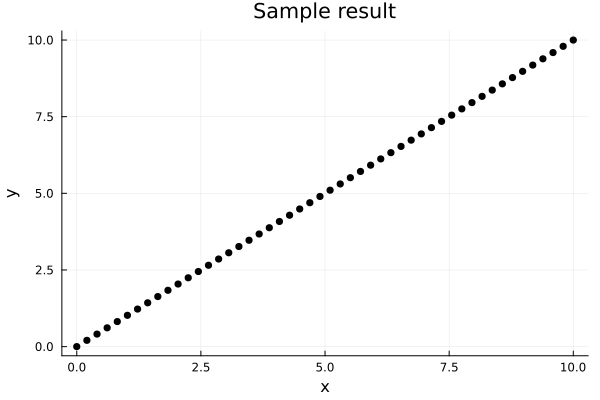

In [13]:
scatter(sol_samp.t, sol_samp.u, marker=(:circle,:black), title ="Sample result", label = false, xlabel = "x", ylabel = "y")

The function ``soln`` is working correctly, since we got our expected trend which is a linear trend where $y=x$.

# The solver object ``ODE_solve``

We implement the Euler algorithm to solve the problem with a given ``f(u, p, t)`` for a 1-dimensional ordinary derivative given by
\begin{equation}
\frac{du}{dt} = f(u, p, t).
\end{equation}

Note that from our previous discussion or simulation, we have $u=P$ and $p = par$.

The [Euler's method](http://www-personal.umich.edu/~mejn/cp/) is a first-order method where the accuracy of the numerical calculation depends on the finite time step $\Delta t$. It is implemented by using the given equation
\begin{equation}
u_{n} = u_{n-1}+\Delta t f(u_{n-1}, p, t_{n-1}).
\end{equation}

We will refer to the solver object as ``ODE_solve`` after confirming that there is no function with the same name to avoid overloading.

In [14]:
? ODE_solve

search:

Couldn't find ODE_solve
Perhaps you meant soln


No documentation found.

Binding `ODE_solve` does not exist.


In [15]:
"""
    ODE_solve( probi::prob; N = 100)
Numerically solves 1D ODE problems using Euler's method.
- Input: ``probi::prob`` describes the problem
         ``N::int`` number of data points tested.
- Output:``t`` the x-value
         ``u`` the y-value
"""
function ODE_solve(probi::prob; N = 100)
    u = zeros(N)     # The result of the derivation with respect to t.
    u[1] = probi.P0    # Initializing the value for the result when t=0.
    
    t = range(probi.t_len[1], probi.t_len[2], N) # Generating the values for t.
    dt = (t[2]-t[1])                           # Getting the time step.
    
    # The Euler's method
    for i in 2:N
        u[i] = u[i-1]+dt*probi.f(u[i-1], probi.par, t[i-1])        
    end
    
    return soln(t, u)
end

ODE_solve

In [16]:
# Solving for the logistic equation model using the self-defined Euler function.
problem = prob(f, P0, par,(0, 10) )
soln0 = ODE_solve(problem)

soln(0.0:0.10101010101010101:10.0, [50.0, 52.525252525252526, 55.04406373705425, 57.543616687576005, 60.01138825047593, 62.43540047804991, 64.80445180628276, 67.1083186817529, 69.33792012809997, 71.48544017367495  …  99.99256653502057, 99.99331733425446, 99.99399230588732, 99.99459910721951, 99.99514462248052, 99.99563504084139, 99.99607592656159, 99.99647228206209, 99.99682860463683, 99.99714893744347])

# KR3
Plot the solution obtained via the Euler method.


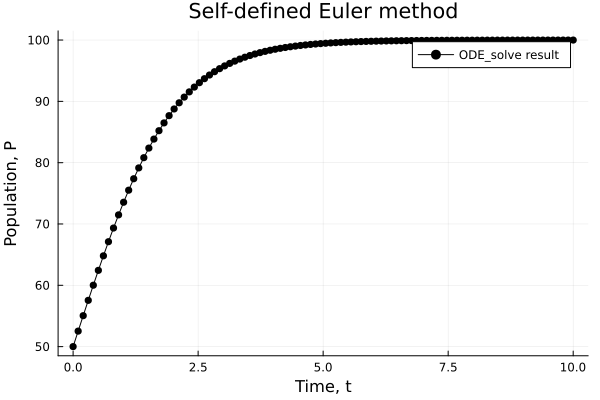

In [17]:
plt = plot( soln0.t, soln0.u
    ,lc=:black
    ,marker=(:circle,:black)
    ,label="ODE_solve result"
    ,xlabel="Time, t"
    ,ylabel="Population, P"
    ,title="Self-defined Euler method"
)

We observe the expected behavior where $P$ must not exceed the carrying Capacity $K$ which we set as $K=100$.

# KR4
Compare the custom package created from the default ODE solver of the ``DifferentialEquations.jl`` package.

To use the ``DifferentialEquations.jl`` package, we must import and add the ``DifferentialEquations``.

In [18]:
using Pkg
Pkg.add("DifferentialEquations")
using DifferentialEquations

   Resolving package versions...
  No Changes to `~/Desktop/Physics 215/Submission/Session 2.1/Project.toml`
  No Changes to `~/Desktop/Physics 215/Submission/Session 2.1/Manifest.toml`


# Define the problem using ``ODEProblem`` and check its contents

We will now explore solving the differential equation using the default ODE solver. We first define the problem by using the function ``ODEProblem`` after defining the ODE, we finally use the function ``solve`` to get the value for the population. Since we are not very familiar with the following, we will first check its documentations and fieldnames.

In [19]:
? ODEProblem

search: ODEProblem RODEProblem SplitODEProblem DynamicalODEProblem



Defines an ordinary differential equation (ODE) problem. Documentation Page: https://diffeq.sciml.ai/stable/types/ode_types/

## Mathematical Specification of an ODE Problem

To define an ODE Problem, you simply need to give the function $f$ and the initial condition $u_0$ which define an ODE:

$$
M \frac{du}{dt} = f(u,p,t)
$$

There are two different ways of specifying `f`:

  * `f(du,u,p,t)`: in-place. Memory-efficient when avoiding allocations. Best option for most cases unless mutation is not allowed.
  * `f(u,p,t)`: returning `du`. Less memory-efficient way, particularly suitable when mutation is not allowed (e.g. with certain automatic differentiation packages such as Zygote).

`u₀` should be an AbstractArray (or number) whose geometry matches the desired geometry of `u`. Note that we are not limited to numbers or vectors for `u₀`; one is allowed to provide `u₀` as arbitrary matrices / higher dimension tensors as well.

For the mass matrix $M$, see the documentation of `ODEFunction`.

## Problem Type

### Constructors

`ODEProblem` can be constructed by first building an `ODEFunction` or by simply passing the ODE right-hand side to the constructor. The constructors are:

  * `ODEProblem(f::ODEFunction,u0,tspan,p=NullParameters();kwargs...)`
  * `ODEProblem{isinplace,specialize}(f,u0,tspan,p=NullParameters();kwargs...)` : Defines the ODE with the specified functions. `isinplace` optionally sets whether the function is inplace or not. This is determined automatically, but not inferred. `specialize` optionally controls the specialization level. See the [specialization levels section of the SciMLBase documentation](https://scimlbase.sciml.ai/stable/interfaces/Problems/#Specialization-Levels) for more details. The default is `AutoSpecialize`.

For more details on the in-place and specialization controls, see the ODEFunction documentation.

Parameters are optional, and if not given then a `NullParameters()` singleton will be used which will throw nice errors if you try to index non-existent parameters. Any extra keyword arguments are passed on to the solvers. For example, if you set a `callback` in the problem, then that `callback` will be added in every solve call.

For specifying Jacobians and mass matrices, see the `ODEFunction` documentation.

### Fields

  * `f`: The function in the ODE.
  * `u0`: The initial condition.
  * `tspan`: The timespan for the problem.
  * `p`: The parameters.
  * `kwargs`: The keyword arguments passed onto the solves.

## Example Problem

```julia
using SciMLBase
function lorenz!(du,u,p,t)
 du[1] = 10.0(u[2]-u[1])
 du[2] = u[1]*(28.0-u[3]) - u[2]
 du[3] = u[1]*u[2] - (8/3)*u[3]
end
u0 = [1.0;0.0;0.0]
tspan = (0.0,100.0)
prob = ODEProblem(lorenz!,u0,tspan)

# Test that it worked
using OrdinaryDiffEq
sol = solve(prob,Tsit5())
using Plots; plot(sol,vars=(1,2,3))
```

## More Example Problems

Example problems can be found in [DiffEqProblemLibrary.jl](https://github.com/SciML/DiffEqProblemLibrary.jl).

To use a sample problem, such as `prob_ode_linear`, you can do something like:

```julia
#] add ODEProblemLibrary
using ODEProblemLibrary
prob = ODEProblemLibrary.prob_ode_linear
sol = solve(prob)
```

---

```
ODEProblem(f::ODEFunction,u0,tspan,p=NullParameters(),callback=CallbackSet())
```

Define an ODE problem from an [`ODEFunction`](@ref).


## Defining the problem

In [20]:
ODEprob = ODEProblem( f, P0, (0, 10), par)

ODEProblem with uType Int64 and tType Int64. In-place: false
timespan: (0, 10)
u0: 50

## The contents of ``ODEProblem``

In [21]:
typeof(ODEprob)

ODEProblem{Int64, Tuple{Int64, Int64}, false, Vector{Int64}, ODEFunction{false, SciMLBase.AutoSpecialize, typeof(f), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}, SciMLBase.StandardODEProblem}

In [22]:
fieldnames(typeof(ODEProblem))

(:var, :body)

# For solving the defined problem using ``solve``

In [23]:
? solve

search: solve solve! ODE_solve LinearSolve LinearSolveFunction concrete_solve



```julia
CommonSolve.solve(args...; kwargs...)
```

Solves an equation or other mathematical problem using the algorithm specified in the arguments. Generally, the interface is:

```julia
CommonSolve.solve(prob::ProblemType,alg::SolverType; kwargs...)::SolutionType
```

where the keyword arguments are uniform across all choices of algorithms.

By default, `solve` defaults to using `solve!` on the iterator form, i.e.:

```julia
solve(args...; kwargs...) = solve!(init(args...; kwargs...))
```

---

```julia
solve(prob::OptimizationProblem, alg::AbstractOptimizationAlgorithm; kwargs...)
```

## Keyword Arguments

The arguments to `solve` are common across all of the optimizers. These common arguments are:

  * `maxiters` (the maximum number of iterations)
  * `maxtime` (the maximum of time the optimization runs for)
  * `abstol` (absolute tolerance in changes of the objective value)
  * `reltol` (relative tolerance  in changes of the objective value)
  * `callback` (a callback function)

If the chosen global optimzer employs a local optimization method a similiar set of common local optimizer arguments exists. The common local optimizer arguments are:

  * `local_method` (optimiser used for local optimization in global method)
  * `local_maxiters` (the maximum number of iterations)
  * `local_maxtime` (the maximum of time the optimization runs for)
  * `local_abstol` (absolute tolerance in changes of the objective value)
  * `local_reltol` (relative tolerance  in changes of the objective value)
  * `local_options` (NamedTuple of keyword arguments for local optimizer)

Some optimizer algorithms have special keyword arguments documented in the solver portion of the documentation and their respective documentation. These arguments can be passed as `kwargs...` to `solve`. Similiarly, the special keyword arguments for the `local_method` of a global optimizer are passed as a `NamedTuple` to `local_options`.

Over time we hope to cover more of these keyword arguments under the common interface.

If a common argument is not implemented for a optimizer a warning will be shown.

## Callback Functions

The callback function `callback` is a function which is called after every optimizer step. Its signature is:

```julia
callback = (x,other_args) -> false
```

where `other_args` is are the extra return arguments of the optimization `f`. This allows for saving values from the optimization and using them for plotting and display without recalculating. The callback should return a Boolean value, and the default should be `false`, such that the optimization gets stopped if it returns `true`.

### Callback Example

```julia
function loss(p)
    # Some calculations
    lossval,x,y,z
end

function callback(p,lossval,x,y,z)
    # Do some analysis

    # When lossval < 0.01, stop the optimization
    lossval < 0.01
end
```

---

```julia
solve(prob::DEProblem, alg::Union{DEAlgorithm,Nothing}; kwargs...)
```

## Arguments

The only positional argument is `alg` which is optional. By default, `alg = nothing`. If `alg = nothing`, then `solve` dispatches to the DifferentialEquations.jl automated algorithm selection (if `using DifferentialEquations` was done, otherwise it will error with a `MethodError`).

## Keyword Arguments

The DifferentialEquations.jl universe has a large set of common arguments available for the `solve` function. These arguments apply to `solve` on any problem type and are only limited by limitations of the specific implementations.

Many of the defaults depend on the algorithm or the package the algorithm derives from. Not all of the interface is provided by every algorithm. For more detailed information on the defaults and the available options for specific algorithms / packages, see the manual pages for the solvers of specific problems. To see whether a specific package is compaible with the use of a given option, see the [Solver Compatibility Chart](@ref)

### Default Algorithm Hinting

To help choose the default algorithm, the keyword argument `alg_hints` is provided to `solve`. `alg_hints` is a `Vector{Symbol}` which describe the problem at a high level to the solver. The options are:

  * `:auto` vs `:nonstiff` vs `:stiff` - Denotes the equation as nonstiff/stiff. `:auto` allow the default handling algorithm to choose stiffness detection algorithms. The default handling defaults to using `:auto`.

Currently unused options include:

  * `:interpolant` - Denotes that a high-precision interpolation is important.
  * `:memorybound` - Denotes that the solver will be memory bound.

This functionality is derived via the benchmarks in [SciMLBenchmarks.jl](https://github.com/SciML/SciMLBenchmarks.jl)

#### SDE Specific Alghints

  * `:additive` - Denotes that the underlying SDE has additive noise.
  * `:stratonovich` - Denotes that the solution should adhere to the Stratonovich interpretation.

### Output Control

These arguments control the output behavior of the solvers. It defaults to maximum output to give the best interactive user experience, but can be reduced all the way to only saving the solution at the final timepoint.

The following options are all related to output control. See the "Examples" section at the end of this page for some example usage.

  * `dense`: Denotes whether to save the extra pieces required for dense (continuous) output. Default is `save_everystep && !isempty(saveat)` for algorithms which have the ability to produce dense output, i.e. by default it's `true` unless the user has turned off saving on steps or has chosen a `saveat` value. If `dense=false`, the solution still acts like a function, and `sol(t)` is a linear interpolation between the saved time points.
  * `saveat`: Denotes specific times to save the solution at, during the solving phase. The solver will save at each of the timepoints in this array in the most efficient manner available to the solver. If only `saveat` is given, then the arguments `save_everystep` and `dense` are `false` by default. If `saveat` is given a number, then it will automatically expand to `tspan[1]:saveat:tspan[2]`. For methods where interpolation is not possible, `saveat` may be equivalent to `tstops`. The default value is `[]`.
  * `save_idxs`: Denotes the indices for the components of the equation to save. Defaults to saving all indices. For example, if you are solving a 3-dimensional ODE, and given `save_idxs = [1, 3]`, only the first and third components of the solution will be outputted. Notice that of course in this case the outputed solution will be two-dimensional.
  * `tstops`: Denotes *extra* times that the timestepping algorithm must step to. This should be used to help the solver deal with discontinuities and singularities, since stepping exactly at the time of the discontinuity will improve accuracy. If a method cannot change timesteps (fixed timestep multistep methods), then `tstops` will use an interpolation, matching the behavior of `saveat`. If a method cannot change timesteps and also cannot interpolate, then `tstops` must be a multiple of `dt` or else an error will be thrown. Default is `[]`.
  * `d_discontinuities:` Denotes locations of discontinuities in low order derivatives. This will force FSAL algorithms which assume derivative continuity to re-evaluate the derivatives at the point of discontinuity. The default is `[]`.
  * `save_everystep`: Saves the result at every step. Default is true if `isempty(saveat)`.
  * `save_on`: Denotes whether intermediate solutions are saved. This overrides the settings of `dense`, `saveat` and `save_everystep` and is used by some applicatioins to manually turn off saving temporarily. Everyday use of the solvers should leave this unchanged. Defaults to `true`.
  * `save_start`: Denotes whether the initial condition should be included in the solution type as the first timepoint. Defaults to `true`.
  * `save_end`: Denotes whether the final timepoint is forced to be saved, regardless of the other saving settings. Defaults to `true`.
  * `initialize_save`: Denotes whether to save after the callback initialization phase (when `u_modified=true`). Defaults to `true`.

Note that `dense` requires `save_everystep=true` and `saveat=false`. If you need additional saving while keeping dense output, see [the SavingCallback in the Callback Library](@ref saving_callback).

### Stepsize Control

These arguments control the timestepping routines.

#### Basic Stepsize Control

These are the standard options for controlling stepping behavior. Error estimates do the comparison

$$
err_{scaled} = err/(abstol + max(uprev,u)*reltol)
$$

The scaled error is guaranteed to be `<1` for a given local error estimate (note: error estimates are local unless the method specifies otherwise). `abstol` controls the non-scaling error and thus can be thought of as the error around zero. `reltol` scales with the size of the dependent variables and so one can interpret `reltol=1e-3` as roughly being (locally) correct to 3 digits. Note tolerances can be specified element-wise by passing a vector whose size matches `u0`.

  * `adaptive`: Turns on adaptive timestepping for appropriate methods. Default is true.
  * `abstol`: Absolute tolerance in adaptive timestepping. This is the tolerance on local error estimates, not necessarily the global error (though these quantities are related). Defaults to `1e-6` on deterministic equations (ODEs/DDEs/DAEs) and `1e-2` on stochastic equations (SDEs/RODEs).
  * `reltol`: Relative tolerance in adaptive timestepping.  This is the tolerance on local error estimates, not necessarily the global error (though these quantities are related). Defaults to `1e-3` on deterministic equations (ODEs/DDEs/DAEs) and `1e-2` on stochastic equations (SDEs/RODEs).
  * `dt`: Sets the initial stepsize. This is also the stepsize for fixed timestep methods. Defaults to an automatic choice if the method is adaptive.
  * `dtmax`: Maximum dt for adaptive timestepping. Defaults are package-dependent.
  * `dtmin`: Minimum dt for adaptive timestepping. Defaults are package-dependent.
  * `force_dtmin`: Declares whether to continue, forcing the minimum `dt` usage. Default is `false`, which has the solver throw a warning and exit early when encountering the minimum `dt`. Setting this true allows the solver to continue, never letting `dt` go below `dtmin` (and ignoring error tolerances in those cases). Note that `true` is not compatible with most interop packages.

#### Fixed Stepsize Usage

Note that if a method does not have adaptivity, the following rules apply:

  * If `dt` is set, then the algorithm will step with size `dt` each iteration.
  * If `tstops` and `dt` are both set, then the algorithm will step with either a size `dt`, or use a smaller step to hit the `tstops` point.
  * If `tstops` is set without `dt`, then the algorithm will step directly to each value in `tstops`
  * If neither `dt` nor `tstops` are set, the solver will throw an error.

#### [Advanced Adaptive Stepsize Control](@id advanced_adaptive_stepsize_control)

These arguments control more advanced parts of the internals of adaptive timestepping and are mostly used to make it more efficient on specific problems. For detained explanations of the timestepping algorithms, see the [timestepping descriptions](@ref timestepping)

  * `internalnorm`: The norm function `internalnorm(u,t)` which error estimates are calculated. Required are two dispatches: one dispatch for the state variable and the other on the elements of the state variable (scalar norm). Defaults are package-dependent.
  * `controller`: Possible examples are [`IController`](@ref), [`PIController`](@ref), [`PIDController`](@ref), [`PredictiveController`](@ref). Default is algorithm-dependent.
  * `gamma`: The risk-factor γ in the q equation for adaptive timestepping of the controllers using it. Default is algorithm-dependent.
  * `beta1`: The Lund stabilization α parameter. Default is algorithm-dependent.
  * `beta2`: The Lund stabilization β parameter. Default is algorithm-dependent.
  * `qmax`: Defines the maximum value possible for the adaptive q. Default is algorithm-dependent.
  * `qmin`: Defines the minimum value possible for the adaptive q. Default is algorithm-dependent.
  * `qsteady_min`: Defines the minimum for the range around 1 where the timestep is held constant. Default is algorithm-dependent.
  * `qsteady_max`: Defines the maximum for the range around 1 where the timestep is held constant. Default is algorithm-dependent.
  * `qoldinit`: The initial `qold` in stabilization stepping. Default is algorithm-dependent.
  * `failfactor`: The amount to decrease the timestep by if the Newton iterations of an implicit method fail. Default is 2.

### Memory Optimizations

  * `calck`: Turns on and off the internal ability for intermediate interpolations (also known as intermediate density). Not the same as `dense`, which is post-solution interpolation. This defaults to `dense || !isempty(saveat) ||  "no custom callback is given"`. This can be used to turn off interpolations (to save memory) if one isn't using interpolations when a custom callback is used. Another case where this may be used is to turn on interpolations for usage in the integrator interface even when interpolations are used nowhere else. Note that this is only required if the algorithm doesn't have a free or lazy interpolation (`DP8()`). If `calck = false`, `saveat` cannot be used. The rare keyword `calck` can be useful in event handling.
  * `alias_u0`: allows the solver to alias the initial condition array that is contained in the problem struct. Defaults to false.

### Miscellaneous

  * `maxiters`: Maximum number of iterations before stopping. Defaults to 1e5.
  * `callback`: Specifies a callback. Defaults to a callback function which performs the saving routine. For more information, see the [Event Handling and Callback Functions manual page](@ref callbacks).
  * `isoutofdomain`: Specifies a function `isoutofdomain(u,p,t)` where, when it returns true, it will reject the timestep. Disabled by default.
  * `unstable_check`: Specifies a function `unstable_check(dt,u,p,t)` where, when it returns true, it will cause the solver to exit and throw a warning. Defaults to `any(isnan,u)`, i.e. checking if any value is a NaN.
  * `verbose`: Toggles whether warnings are thrown when the solver exits early. Defaults to true.
  * `merge_callbacks`: Toggles whether to merge `prob.callback` with the `solve` keyword argument `callback`. Defaults to `true`.
  * `wrap`: Toggles whether to wrap the solution if `prob.problem_type` has a preferred alternate wrapper type for the solution. Useful when speed, but not shape of solution is important. Defaults to `Val(true)`. `Val(false)` will cancel wrapping the solution.

### Progress Monitoring

These arguments control the usage of the progressbar in the Juno IDE.

  * `progress`: Turns on/off the Juno progressbar. Default is false.
  * `progress_steps`: Numbers of steps between updates of the progress bar. Default is 1000.
  * `progress_name`: Controls the name of the progressbar. Default is the name of the problem type.
  * `progress_message`: Controls the message with the progressbar. Defaults to showing `dt`, `t`, the maximum of `u`.

### Error Calculations

If you are using the test problems (ex: `ODETestProblem`), then the following options control the errors which are calculated:

  * `timeseries_errors`: Turns on and off the calculation of errors at the steps which were taken, such as the `l2` error. Default is true.
  * `dense_errors`: Turns on and off the calculation of errors at the steps which require dense output and calculate the error at 100 evenly-spaced points throughout `tspan`. An example is the `L2` error. Default is false.

### Sensitivity Algorithms (`sensealg`)

`sensealg` is used for

## Examples

The following lines are examples of how one could use the configuration of `solve()`. For these examples a 3-dimensional ODE problem is assumed, however the extention to other types is straightforward.

1. `solve(prob, AlgorithmName())` : The "default" setting, with a user-specified

algorithm (given by `AlgorithmName()`). All parameters get their default values.   This means that the solution is saved at the steps the Algorithm stops internally   and dense output is enabled if the chosen algorithm allows for it.

All other integration parameters (e.g. stepsize) are chosen automatically.

2. `solve(prob, saveat = 0.01, abstol = 1e-9, reltol = 1e-9)` : Standard setting

for accurate output at specified (and equidistant) time intervals, used for   e.g. Fourier Transform. The solution is given every 0.01 time units,   starting from `tspan[1]`. The solver used is `Tsit5()` since no keyword   `alg_hits` is given.

3. `solve(prob, maxiters = 1e7, progress = true, save_idxs = [1])` : Using longer

maximum number of solver iterations can be useful when a given `tspan` is very   long. This example only saves the first of the variables of the system, either   to save size or because the user does not care about the others. Finally, with   `progress = true` you are enabling the progress bar.


## Using ``solve``

In [24]:
soln_def = solve(ODEprob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 12-element Vector{Float64}:
  0.0
  0.11487029497536971
  0.4745940352187301
  0.989103355988297
  1.6313633310106166
  2.5436206692635106
  3.3219163778420198
  4.331616347377585
  5.4002528428686665
  6.724035447351663
  8.259337306463793
 10.0
u: 12-element Vector{Float64}:
 50.0
 52.86860375502463
 61.64705298101047
 72.89108096946335
 83.63563060071553
 92.71422282332728
 96.51714400003276
 98.701821224321
 99.54988177678196
 99.8791727043212
 99.97347557697648
 99.99510512727413

# Contents of ``solve``

In [25]:
typeof(soln_def)

OrdinaryDiffEq.ODECompositeSolution{Float64, 1, Vector{Float64}, Nothing, Nothing, Vector{Float64}, Vector{Vector{Float64}}, ODEProblem{Float64, Tuple{Float64, Float64}, false, Vector{Int64}, ODEFunction{false, SciMLBase.AutoSpecialize, typeof(f), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}, SciMLBase.StandardODEProblem}, CompositeAlgorithm{Tuple{Tsit5{typeof(OrdinaryDiffEq.trivial_limiter!), typeof(OrdinaryDiffEq.trivial_limiter!), Static.False}, Rosenbrock23{0, false, Nothing, typeof(OrdinaryDiffEq.DEFAULT_PRECS), Val{:forward}, true, nothing}}, OrdinaryDiffEq.AutoSwitchCache{Tsit5{typeof(OrdinaryDiffEq.trivial_limiter!), typeof(OrdinaryDiffEq.trivial_limiter!), Static.False}, Rosenbrock23{0, false, Nothing, typeof(OrdinaryDiffEq.DEFAULT_PRECS), Val{:forward}, t

In [26]:
fieldnames(typeof(soln_def))

(:u, :u_analytic, :errors, :t, :k, :prob, :alg, :interp, :alg_choice, :dense, :tslocation, :destats, :retcode)

# Plot result of default ODE solver

Using the result of the ``solve`` function, we plot the interpolated data for our given problem.

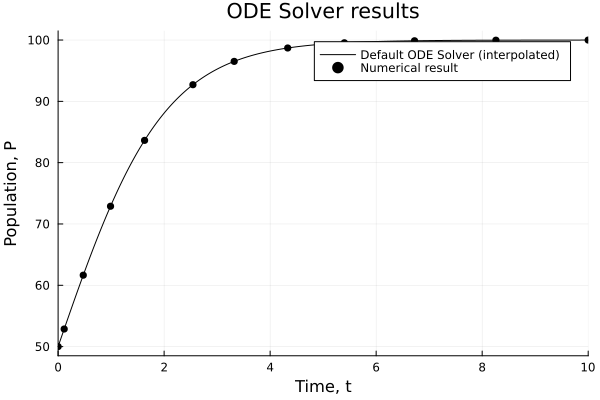

In [27]:
plt = plot(soln_def
    ,lc=:black
    ,label="Default ODE Solver (interpolated)"
)
plot!(plt
    ,title="ODE Solver results"
    ,xlabel="Time, t"
    ,ylabel="Population, P"
)
scatter!(soln_def.t, soln_def.u, markercolor =:black, label = "Numerical result")

# Plotting both the default method and the ``ODE_Solve``

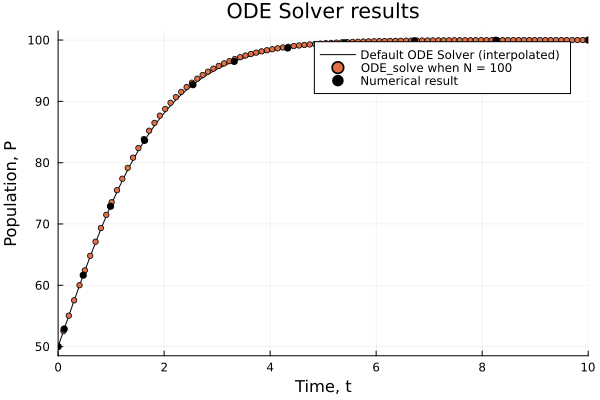

In [28]:
plt = plot(soln_def
    ,lc=:black
    ,label="Default ODE Solver (interpolated)"
)

scatter!( soln0.t, soln0.u
    ,xlabel="x-axis"
    ,ylabel="y-axis"
    ,markersize = 3
    ,label="ODE_solve when N = 100"
)

plot!(plt
    ,title="ODE Solver results"
    ,xlabel="Time, t"
    ,ylabel="Population, P"
)
scatter!(soln_def.t, soln_def.u, markercolor =:black, label = "Numerical result")

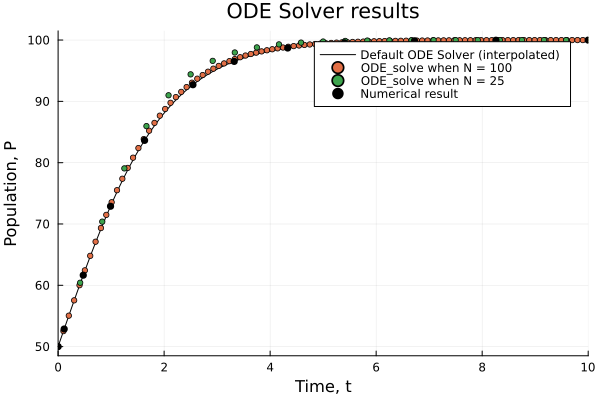

In [29]:
soln1 = ODE_solve(problem; N = 25)

plt = plot(soln_def
    ,lc=:black
    ,label="Default ODE Solver (interpolated)"
)

scatter!( soln0.t, soln0.u
    ,xlabel="x-axis"
    ,ylabel="y-axis"
    ,markersize = 3
    ,label="ODE_solve when N = 100"
)

scatter!( soln1.t, soln1.u
    ,xlabel="x-axis"
    ,ylabel="y-axis"
    ,markersize = 3
    ,label="ODE_solve when N = 25"
)


plot!(plt
    ,title="ODE Solver results"
    ,xlabel="Time, t"
    ,ylabel="Population, P"
)
scatter!(soln_def.t, soln_def.u, markercolor =:black, label = "Numerical result")

From here, we observe that the custom or self-defined ``ODE_solve`` function and the default function ``solve`` from ``DifferentialEquations.jl`` have approximately the same result. To get a better idea, we choose to check other step size used in ``ODE_solve``. It shows that the ``ODE_solve`` function which uses the Euler method is more accurate for smaller step size given by higher number of points $N$. However, for larger step size, it would deviate slightly from the expected numerical result. The ``solve`` function on the other hand gives a more accurate result for the ODE which has an adaptive step size. Moreover, unlike the ``ODE_solve``, ``solve`` can implement various algoirithms in solving for the differential equations.

# KR5
Discuss at least one possible point of expansion of the custom package and follow the usual usage pattern of the packages (addition of default parameter arguments, for example).


For solving differential equations, a possible point of expansion is the argument ``alg`` for the algorithm implemented. Other methods can be included such as the Heun's method for lesser errors for a chosen ``dt``. 

To give a brief introduction, Heun's method otherwise referred to as the predictor-corrector or modified Euler's method. As the name suggests, it has two steps which includes a predictor and a corrector step. The predictor step uses Euler's method while the corrector method is the [trapezoidal rule](http://www-personal.umich.edu/~mejn/cp/) given by
\begin{equation}
u_n = u_{n-1}+\frac{1}{2}\Delta t(f(u_{n-1}, p, t_{n-1})+f(u_{n, Euler}, p, t_{n})).
\end{equation}


As shown below, we included the Heun's method for the algorithm used. Though, we also refer to Euler's method as the default method if the Heun's method is not specified.

In [30]:
"""
    ODE_solve( probi::prob; N = 100, alg = "Euler" )
Numerically solves 1D ODE problems using Euler's method.
- Input: ``probi::prob`` describes the problem
         ``N::int`` number of data points tested.
         ``alg`` the method or algorithm implemented.
- Output:``t`` the x-value
         ``u`` the y-value
"""
function ODE_solve( probi::prob; N = 100, alg = "Euler" )
    u = zeros(N)     # The result of the derivation with respect to t.
    u[1] = probi.P0    # Initializing the value for the result when t=0.
    
    if alg == "Euler"
        t = range(probi.t_len[1], probi.t_len[2], N) # Generating the values for t.
        dt = (t[2]-t[1])                           # Getting the time step.
        # The Euler's method
        for i in 2:N
            u[i] = u[i-1]+dt*probi.f(u[i-1], probi.par, t[i-1])        
        end
        
    elseif alg == "Heun"
        t = range(probi.t_len[1], probi.t_len[2], N) # Generating the values for t.
        dt = (t[2]-t[1])                           # Getting the time step.
        # The Euler's method
        for i in 2:N
            u[i] = u[i-1]+dt*probi.f(u[i-1], probi.par, t[i-1])
            u[i] = u[i-1]+(1/2)*dt*(probi.f(u[i-1], probi.par, t[i-1])+probi.f(u[i], probi.par, t[i]))
        end
    end
    return soln(t, u)
end

ODE_solve

We run the new function for both methods, to show their differences. Note that the same problem and parameters are used.

In [31]:
problem = prob(f, P0, par,(0, 10))
solnH = ODE_solve(problem; N = 50, alg = "Heun")
solnE = ODE_solve(problem; N = 50);

Finally, we plot the result for the Euler's and Heun's method. For reference, we als included the interpolated result of the ODE solver.

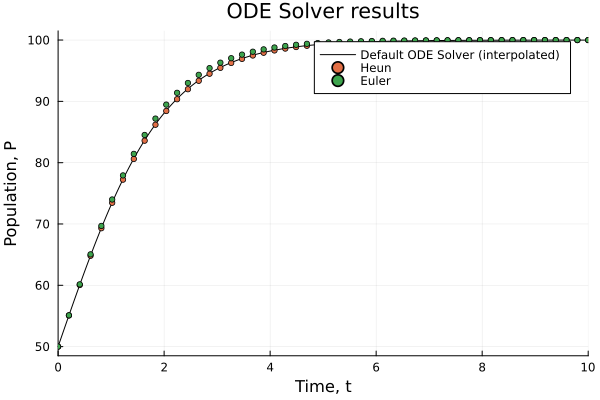

In [32]:
plt = plot(soln_def
    ,lc=:black
    ,label="Default ODE Solver (interpolated)"
)
plot!(plt
    ,title="ODE Solver results"
    ,xlabel="Time, t"
    ,ylabel="Population, P"
)
scatter!(solnH.t, solnH.u, markersize = 3, label = "Heun")
scatter!(solnE.t, solnE.u, markersize = 3, label = "Euler")

The result shows that the expansion of adding another arguement ``alg`` to our custom package, let us implement our ``ODE_solve`` using another method. In here, we have included Heun's method which shows a more similar result to the default ODE solver in Julia.